In [ ]:
%reload_ext autoreload
%autoreload 2

# 数据分析
> Pandas：处理表格数据，相当于一个python版的excel

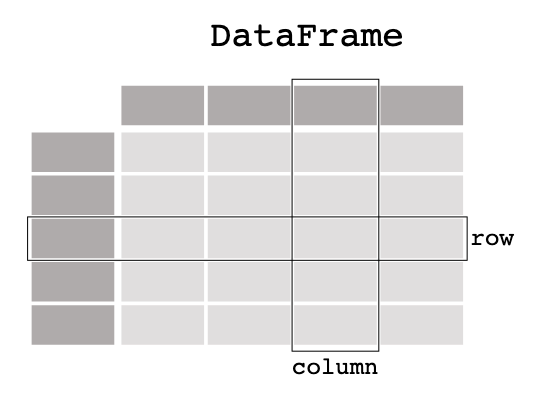
https://pandas.pydata.org/docs/getting_started/index.html#getting-started

In [ ]:
# export
import requests,json,re,random,sys
from bs4 import BeautifulSoup,Tag,NavigableString

from crawler_from_scratch.proxy import *

from concurrent.futures import ThreadPoolExecutor
import pandas as pd


## 数据分析

### 核心概念
* DataFrame：二维数据，类似于tabular data表格
* Series：一维数据，类似于array数组

* Index：索引
* Column：列名

In [ ]:
with open('./data/recipe_data.json','r') as f:
    recipe_data = json.load(f)
print(len(recipe_data))

2959


In [ ]:
df = pd.DataFrame.from_dict(recipe_data,orient='index')

type(df),type(df.title)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
df.index,df.columns,df.values[:2]

(Index(['1093978', '263674', '245958', '103965340', '101865764', '100422462',
        '1102340', '1002365', '1003015', '9909',
        ...
        '102264090', '1072145', '1000073', '100621783', '101766242', '1012115',
        '37624', '1007871', '21562', '101769582'],
       dtype='object', length=2959),
 Index(['title', 'author_link', 'author_name', 'created_at', 'category', 'ings',
        'score', 'cooked'],
       dtype='object'),
 array([['无节操穿肠意面', '/cook/10492957/', '局局', '2013-05-11 09:16:52', '面条',
         list(['香肠', '意面']), '8.1', '1165'],
        ['香橙蛋糕', '/cook/10094685/', '八卦兔JadeCw', '2012-12-14 22:33:36',
         '蛋糕', list(['橙子', '细砂糖', '柠檬', '盐']), '7.9', '753']], dtype=object))

### 数据类型
> 1.0版本增加了convert_dtype函数，可以自动识别，这里用的老版本，所以手动转换一下

In [ ]:
df.head()

,title,author_link,author_name,created_at,category,ings,score,cooked
1093978,无节操穿肠意面,/cook/10492957/,局局,2013-05-11 09:16:52,面条,"[香肠, 意面]",8.1,1165
263674,香橙蛋糕,/cook/10094685/,八卦兔JadeCw,2012-12-14 22:33:36,蛋糕,"[橙子, 细砂糖, 柠檬, 盐]",7.9,753
245958,红烧牛肉面,/cook/10007303/,tony小屋,2012-03-25 18:16:51,面,"[辣椒丝, 牛肉, 面条, 青菜, 番茄, 大蒜, 生姜, 香叶, 陈皮, 八角, 小茴香,...",8.4,6307
103965340,比肉还好吃的金针菇豆皮卷,/cook/115728870/,糖宝麻麻-木木,2019-08-04 20:25:52,家常菜,"[金针菇, 豆皮, 蒜瓣, 葱花, 牙签]",7.2,789
101865764,广式月饼（3种口味的）,/cook/106283994/,Jin小厨一级公共营养师,2016-07-30 16:42:21,月饼,"[中筋面粉, 转化糖浆, 花生油, 枧水, 蛋黄, 白莲蓉馅十红莲蓉十红豆沙馅, 新鲜的蛋黄...",8.4,665


In [ ]:
# hide
df.dtypes

title          object
author_link    object
author_name    object
created_at     object
category       object
ings           object
score          object
cooked         object
dtype: object

In [ ]:
df = df.astype({'score':'float','cooked':'int','created_at':'datetime64'})
df.dtypes

title                  object
author_link            object
author_name            object
created_at     datetime64[ns]
category               object
ings                   object
score                 float64
cooked                  int64
dtype: object

### 统计菜谱作者数据
> 这里运用到：
* 聚类 groupby
* 表单增加列
* 表单数据运算
* 筛选数据

In [ ]:
author_df = df.groupby('author_name').sum()
author_df['count'] = df.groupby('author_name').count().title

author_df['avg_score'] = author_df['score']/author_df['count']
author_df['avg_cooked'] = author_df['cooked']/author_df['count']

In [ ]:
author_df.sort_values(by='count',ascending=False).head()

,score,cooked,count,avg_score,avg_cooked
author_name,,,,,
小白素食记录,558.6,81172,70,7.980000,1159.600000
啊呜511,487.1,101009,57,8.545614,1772.087719
Tinrry甜悦,460.1,254958,54,8.520370,4721.444444
君之,389.3,194279,49,7.944898,3964.877551
红叶99,390.7,204965,46,8.493478,4455.760870


#### 行列选择

In [ ]:
# 类似于list slice的操作方式，只能用列名选择列，或者用数字区间选择行
author_df['score'],type(author_df['score'])
author_df[:1],type(author_df[:1])

(             score  cooked  count  avg_score  avg_cooked
 author_name                                             
 -kitkat-       8.0    1102      1        8.0      1102.0,
 pandas.core.frame.DataFrame)

In [ ]:
# 按标签筛选，：是区间选择，[]是多选
author_df.loc['黄长脖':'黑芝麻吐司',['score','count']]

,score,count
author_name,,
黄长脖,8.1,1
黄黄美食123,7.3,1
黑Black,7.8,1
黑芝麻吐司,8.2,1


In [ ]:
# 按照位置数字选择
author_df.iloc[:5,[3,1]]

,avg_score,cooked
author_name,,
-kitkat-,8.000,1102
._ltpz,8.400,1730
00怡然00,8.500,948
0夏天0,8.105,54304
0李大呆0,8.200,19152


#### 数据筛选

In [ ]:
author_df[(author_df.avg_score > 8) & (author_df.cooked > 10000)].head()

,score,cooked,count,avg_score,avg_cooked
author_name,,,,,
0夏天0,162.1,54304,20,8.105000,2715.200000
0李大呆0,8.2,19152,1,8.200000,19152.000000
Amanda曼达,140.7,28164,17,8.276471,1656.705882
E路拾缘,25.4,30315,3,8.466667,10105.000000
FeEl,8.7,68693,1,8.700000,68693.000000


### 统计热门用料
> 主要是清洗数据，比如去掉NaN项，抽取汉字词语

In [ ]:
def count_ings(df_raw,column_name):
    df = df_raw.dropna()
    ings_list = []
    for l in df[column_name]:
        for i in l: 
            # 这里可以将所有汉字抽取出来
            words  = re.findall(r'([\u4e00-\u9fa5]+)',i)
            # 清洗
            words = list(set(words))
            for n in ['克','水']:
                if n in words:
                    words.remove(n)
                
            ings_list += words
            
    ings_sr = pd.Series(ings_list)
    return ings_sr.value_counts()
     

In [ ]:
count_ings(df,'ings').head(10)

盐       1378
鸡蛋       693
糖        570
细砂糖      542
黄油       531
牛奶       526
生抽       514
低筋面粉     386
白糖       356
料酒       355
dtype: int64

#### 统计不同类别下的热门用料

In [ ]:
df.groupby('category').count().sort_values(by='title',ascending=False).head(10)

,title,author_link,author_name,created_at,ings,score,cooked
category,,,,,,,
菜谱,464,464,464,464,464,431,464
家常菜,347,347,347,347,347,330,347
蛋糕,256,256,256,256,256,254,256
面包,183,183,183,183,183,183,183
甜品,112,112,112,112,112,108,112
饼干,95,95,95,95,95,95,95
早餐,88,88,88,88,88,87,88
饼,77,77,77,77,77,74,77
月饼,73,73,73,73,73,72,73


In [ ]:
count_ings(df[df.category == '菜谱'],'ings').head(5)

盐     202
糖      92
生抽     81
鸡蛋     78
黄油     73
dtype: int64

In [ ]:
count_ings(df[df.category == '早餐'],'ings').head(5)

鸡蛋    46
盐     45
牛奶    19
酵母    15
面粉    14
dtype: int64

In [ ]:
count_ings(df[df.category == '家常菜'],'ings').head(5)

盐     231
生抽    135
料酒    127
姜      79
葱      76
dtype: int64